# Vergleich der Algorithmen

In [33]:
# imports
# add folder to syspath to import GeneticAlgorithm 
import os
import sys
path = os.path.dirname(os.path.abspath(''))
sys.path.insert(0, path+'/GeneticAlgorithm')
from GeneticAlgorithm import GeneticAlgorithm
sys.path.insert(0, path+'/ParticleSwarmOptimization')
from ParticleSwarmOptimization import ParticleSwarmOptimization

 # add folder to syspath to import ACO 
sys.path.insert(0, os.path.dirname(path)+'/AntColonyOptimization')

import numpy as np
from matplotlib import pyplot as plt


# Funktion zum Vergleich Bestwerte und der Laufzeit

In [92]:
def write_best_results_and_runtime(filepath):
    ''''Writes an overview of the best results and runtime to the file at filepath'''
    algos = ['GA', 'PSO', 'ACO']
    sizes = [50,100,250,500,1000]
    path = os.path.dirname(os.path.abspath(''))
    path = path+ '/Compare'
    with open(filepath, 'w')  as res_file:
        res_file.write('Übersicht über die Algorithmen\n')
        for size in sizes:
            for number in np.arange(10):
                best_sol = np.load(os.path.join(path, f'Ressources/newproblem/optimal_solutions_{size}.npy'))
                best_sol = best_sol[number]
                res_file.write(f'new_{size}_{number} Problem:\n')
                res_file.write(f'Optimale Lösung des Problems: {best_sol}\n')
                for algo in algos: 
                    try:
                        gbest = np.load(os.path.join(path,f'Solutions/new_{size}_{number}_{algo}_gbest_bins.npy'))
                        runtime = np.load(os.path.join(path,f'Solutions/new_{size}_{number}_{algo}_runtime.npy'))
                    except:
                        print(f'Ergebnis des new_{size}_{number} Problem für {algo} konnte nicht geladen werden.')
                        gbest = [0]
                        runtime = 0 
                    if algo == 'PSO' or algo == 'ACO':
                        try: 
                            gbest = np.min(gbest,1)
                        except:
                            print('Problem beim umwandeln.')
                    gbest_1 = int(np.min(gbest))
                    gbest_1_freq = np.count_nonzero(gbest == gbest_1)/len(gbest)*100 
                    gbest_2 = gbest_1+1
                    gbest_2_freq = np.count_nonzero(gbest == gbest_2)/len(gbest)*100 
                    gbest_3 = gbest_2+1
                    gbest_3_freq = np.count_nonzero(gbest == gbest_3)/len(gbest)*100 
                    runtime_av = np.average(runtime)
                    res_string = f'Algorithmus:\t{algo:10s} |  Beste Werte: {gbest_1:3.0f} in {gbest_1_freq:3.0f}% | {gbest_2:3.0f} in {gbest_2_freq:3.0f}% | {gbest_3:3.0f} in {gbest_3_freq:3.0f}% der Fälle. | Mit Laufzeit: {runtime_av:10.2f}'
                    res_file.write(res_string+ '\n')
                res_file.write('---------------------------------------------------------------------------\n')
                res_file.write('\n')

In [93]:
write_best_results_and_runtime(os.path.dirname(os.path.abspath(''))+'/Compare/Solutions/compare.txt')

Ergebnis des new_1000_1 Problem für GA konnte nicht geladen werden.
Ergebnis des new_1000_1 Problem für PSO konnte nicht geladen werden.
Problem beim umwandeln.
Ergebnis des new_1000_1 Problem für ACO konnte nicht geladen werden.
Problem beim umwandeln.
Ergebnis des new_1000_2 Problem für GA konnte nicht geladen werden.
Ergebnis des new_1000_2 Problem für PSO konnte nicht geladen werden.
Problem beim umwandeln.
Ergebnis des new_1000_2 Problem für ACO konnte nicht geladen werden.
Problem beim umwandeln.
Ergebnis des new_1000_3 Problem für GA konnte nicht geladen werden.
Ergebnis des new_1000_3 Problem für PSO konnte nicht geladen werden.
Problem beim umwandeln.
Ergebnis des new_1000_3 Problem für ACO konnte nicht geladen werden.
Problem beim umwandeln.
Ergebnis des new_1000_4 Problem für GA konnte nicht geladen werden.
Ergebnis des new_1000_4 Problem für PSO konnte nicht geladen werden.
Problem beim umwandeln.
Ergebnis des new_1000_4 Problem für ACO konnte nicht geladen werden.
Problem 

# Compare Function

In [135]:
def plot_problem(size, number, type, xlim = None, ylim = None):
    '''
    Plots the new Problem
    size: Size of the Problem
    number: Problem Number
    type: 'Average', 'Best' or 'Worst'
    xlim: array of x values to be plotted
    ylim: array of y values to be plotted
    '''
    path = os.path.dirname(os.path.abspath(''))
    path = path+ '/Compare'
    optimal_solution = np.load(os.path.join(path, f'Ressources/newproblem/optimal_solutions_{size}.npy'))
    optimal_solution = optimal_solution[number]
    ga_vals = np.array([])
    pso_vals = np.array([])
    aco_vals = np.array([])
    if type == 'Average':
        # load the relevant information 
        try:
            ga_vals = np.average(np.load(os.path.join(path,f'Solutions/new_{size}_{number}_GA_average_bins.npy')),0)
            ga_x = np.arange(len(ga_vals)) * (100/len(ga_vals))
            pso_vals = np.average(np.load(os.path.join(path,f'Solutions/new_{size}_{number}_PSO_average_bins.npy')),0)
            pso_x = np.arange(len(pso_vals))* (100/len(pso_vals))
            aco_vals = np.average(np.load(os.path.join(path,f'Solutions/new_{size}_{number}_ACO_average_bins.npy')),0)
            aco_x = np.arange(len(aco_vals))* (100/len(aco_vals))
        except Exception as e:
            print(e)
            print('Problem konnte nicht geladen werden')
    if type == 'Best':
        # load the relevant information 
        try:
            ga_vals = np.load(os.path.join(path,f'Solutions/new_{size}_{number}_GA_best_bins.npy'))
            ga_x = np.arange(len(ga_vals)) * (100/len(ga_vals))
            pso_vals = np.average(np.load(os.path.join(path,f'Solutions/new_{size}_{number}_PSO_best_bins.npy')),0)
            pso_x = np.arange(len(pso_vals))* (100/len(pso_vals))
            aco_vals = np.average(np.load(os.path.join(path,f'Solutions/new_{size}_{number}_ACO_best_bins.npy')),0)
            aco_x = np.arange(len(aco_vals))* (100/len(aco_vals))
        except Exception as e:
            print(e)
            print('Problem konnte nicht geladen werden')
    if type == 'Worst':
        try:
            ga_vals = np.load(os.path.join(path,f'Solutions/new_{size}_{number}_GA_worst_bins.npy'))
            ga_x = np.arange(len(ga_vals)) * (100/len(ga_vals))
            pso_vals = np.average(np.load(os.path.join(path,f'Solutions/new_{size}_{number}_PSO_worst_bins.npy')),0)
            pso_x = np.arange(len(pso_vals))* (100/len(pso_vals))
            aco_vals = np.average(np.load(os.path.join(path,f'Solutions/new_{size}_{number}_ACO_worst_bins.npy')),0)
            aco_x = np.arange(len(aco_vals))* (100/len(aco_vals))
        except Exception as e:
            print(e)
            print('Problem konnte nicht geladen werden')
    # get x_vals
    x_lim = np.max(np.array([len(ga_vals), len(pso_vals), len(aco_vals)]))
    x_vals = np.arange(x_lim)
    # Plot the data
    # Punkte visualisieren
    fig, ax = plt.subplots(1,figsize=(16,7))
    fig.tight_layout(h_pad=6)
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    ax.set_xlabel('Laufzeit in %')
    ax.set_ylabel("Number of Bins")
    ax.set_title(f'{type} Number of bins for {size} Objects (Average 10 runs)')
    ax.plot(ga_x, ga_vals, color="blue", label = f'Genetic Algorithm')
    ax.plot(pso_x, pso_vals, color="red", label = f'Particle Swarm Optimization')
    ax.plot(aco_x, aco_vals, color="green", label = f'Ant Colony Optimization')
    ax.plot(np.arange(100), [optimal_solution]*100, color = "black",linestyle = 'dashed', label = f'Optimal Solution ({optimal_solution} Container)')
    ax.legend()
    plt.show()

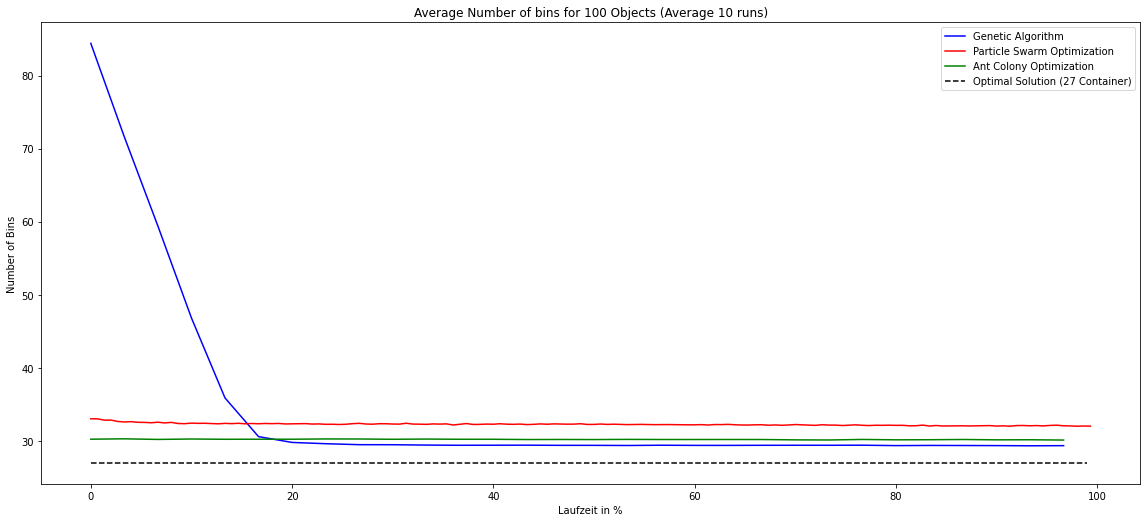

In [136]:
plot_problem(100, 3, 'Average')

In [2]:
# lade die Probleme (klassisch)
# small problem
small_objects  = np.load(os.path.join(path,'Compare/Ressources/betterproblem/small_objects.npy'))
small_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/small_container.npy'))
small_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/small_optimal.npy'))
# medium Problem
medium_objects= np.load(os.path.join(path,'Compare/Ressources/betterproblem/medium_objects.npy'))
medium_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/medium_container.npy'))
medium_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/medium_optimal.npy'))
# large Problem
large_objects  = np.load(os.path.join(path,'Compare/Ressources/betterproblem/large_objects.npy'))
large_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/large_container.npy'))
large_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/large_optimal.npy'))

print('Optimale Lösungen')
print(f'Kleines Problem {small_optimal_solution}')
print(f'Medium Problem {medium_optimal_solution}')
print(f'Großes Problem {large_optimal_solution}')

Optimale Lösungen
Kleines Problem 3
Medium Problem 16
Großes Problem 35


In [3]:
# lade die Probleme (neu)
# 50
new_50_0 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o50_0.npy'))
new_50_1 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o50_1.npy'))
new_50_2 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o50_2.npy'))
new_50_3 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o50_3.npy'))
new_50_4 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o50_4.npy'))
new_50_5 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o50_5.npy'))
new_50_6 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o50_6.npy'))
new_50_7 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o50_7.npy'))
new_50_8 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o50_8.npy'))
new_50_9 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o50_9.npy'))
new_50_container = np.load(os.path.join(path,'Compare/Ressources/newproblem/medium_container.npy'))
new_50_optimal = np.load(os.path.join(path,'Compare/Ressources/newproblem/optimal_solutions_50.npy'))
# 100
new_100_0 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o100_0.npy'))
new_100_1 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o100_1.npy'))
new_100_2 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o100_2.npy'))
new_100_3 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o100_3.npy'))
new_100_4 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o100_4.npy'))
new_100_5 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o100_5.npy'))
new_100_6 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o100_6.npy'))
new_100_7 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o100_7.npy'))
new_100_8 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o100_8.npy'))
new_100_9 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o100_9.npy'))
new_100_container = np.load(os.path.join(path,'Compare/Ressources/newproblem/medium_container.npy'))
new_100_optimal = np.load(os.path.join(path,'Compare/Ressources/newproblem/optimal_solutions_100.npy'))
# 250
new_250_0 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o250_0.npy'))
new_250_1 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o250_1.npy'))
new_250_2 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o250_2.npy'))
new_250_3 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o250_3.npy'))
new_250_4 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o250_4.npy'))
new_250_5 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o250_5.npy'))
new_250_6 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o250_6.npy'))
new_250_7 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o250_7.npy'))
new_250_8 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o250_8.npy'))
new_250_9 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o250_9.npy'))
new_250_container = np.load(os.path.join(path,'Compare/Ressources/newproblem/medium_container.npy'))
new_250_optimal = np.load(os.path.join(path,'Compare/Ressources/newproblem/optimal_solutions_250.npy'))
# 500
new_500_0 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o500_0.npy'))
new_500_1 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o500_1.npy'))
new_500_2 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o500_2.npy'))
new_500_3 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o500_3.npy'))
new_500_4 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o500_4.npy'))
new_500_5 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o500_5.npy'))
new_500_6 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o500_6.npy'))
new_500_7 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o500_7.npy'))
new_500_8 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o500_8.npy'))
new_500_9 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o500_9.npy'))
new_500_container = np.load(os.path.join(path,'Compare/Ressources/newproblem/medium_container.npy'))
new_500_optimal = np.load(os.path.join(path,'Compare/Ressources/newproblem/optimal_solutions_500.npy'))
# 1000
new_1000_0 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o1000_0.npy'))
new_1000_1 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o1000_1.npy'))
new_1000_2 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o1000_2.npy'))
new_1000_3 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o1000_3.npy'))
new_1000_4 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o1000_4.npy'))
new_1000_5 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o1000_5.npy'))
new_1000_6 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o1000_6.npy'))
new_1000_7 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o1000_7.npy'))
new_1000_8 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o1000_8.npy'))
new_1000_9 = np.load(os.path.join(path,'Compare/Ressources/newproblem/o1000_9.npy'))
new_1000_container = np.load(os.path.join(path,'Compare/Ressources/newproblem/medium_container.npy'))
new_1000_optimal = np.load(os.path.join(path,'Compare/Ressources/newproblem/optimal_solutions_1000.npy'))
print('Optimale Lösungen')
print(f'50: {new_50_optimal}')
print(f'100 {new_100_optimal}')
print(f'250 {new_250_optimal}')
print(f'500 {new_500_optimal}')
print(f'1000 {new_1000_optimal}')

Optimale Lösungen
50: [14 14 14 15 14 13 13 13 14 14]
100 [30 26 29 27 29 29 29 25 27 27]
250 [72 70 67 71 71 71 67 74 75 71]
500 [145 139 141 146 143 149 142 143 147 140]
1000 [283 288 283 284 282 293 286 282 285 291]


In [4]:
number_average = 10

# PSO

In [5]:
# _,solution_bins[i], runtime[i], gbest_bins[i], gbest_fitness[i], average_bins[i], best_bins[i], worst_bins[i], fitness[i], _, _, _ = PSO.run()

number_particles = 40
iterations = 100

## PSO new_50

### new_50_0

In [6]:
new_50_0_PSO_solution_bins = np.zeros(number_average) #wichtig
new_50_0_PSO_runtime = np.zeros(number_average) #wichtig
new_50_0_PSO_gbest_bins = np.zeros((number_average, iterations))
new_50_0_PSO_gbest_fitness = np.zeros((number_average, iterations))
new_50_0_PSO_average_bins = np.zeros((number_average, iterations)) #wichtig
new_50_0_PSO_best_bins = np.zeros((number_average, iterations)) #wichtig
new_50_0_PSO_worst_bins = np.zeros((number_average, iterations)) #wichtig
new_50_0_PSO_fitness = np.zeros((number_average, iterations)) #wichtig
new_50_0_PSO_unfit_moves = np.zeros((number_average, iterations))
new_50_0_PSO_chaos_moves = np.zeros((number_average, iterations))
new_50_0_PSO_heuristic_moves = np.zeros((number_average, iterations))

for i in range(number_average):
    PSO = ParticleSwarmOptimization(number_particles, iterations, new_50_0, new_50_container[0], new_50_container[1], 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 'random', 'first_fit', 'first_fit')
    _, new_50_0_PSO_solution_bins[i], new_50_0_PSO_runtime[i], new_50_0_PSO_gbest_bins[i], new_50_0_PSO_gbest_fitness[i], new_50_0_PSO_average_bins[i], new_50_0_PSO_best_bins[i], new_50_0_PSO_worst_bins[i], new_50_0_PSO_fitness[i], new_50_0_PSO_unfit_moves[i], new_50_0_PSO_chaos_moves[i], new_50_0_PSO_heuristic_moves[i] = PSO.run()
    print(str(i) + ' done')
    
name1 = 'Solutions/new_50_0_PSO_solution_bins.npy'
name2 = 'Solutions/new_50_0_PSO_runtime.npy'
name3 = 'Solutions/new_50_0_PSO_gbest_bins.npy'
name4 = 'Solutions/new_50_0_PSO_gbest_fitness.npy'
name5 = 'Solutions/new_50_0_PSO_average_bins.npy'
name6 = 'Solutions/new_50_0_PSO_best_bins.npy'
name7 = 'Solutions/new_50_0_PSO_worst_bins.npy'
name8 = 'Solutions/new_50_0_PSO_fitness.npy'
name9 = 'Solutions/new_50_0_PSO_unfit_moves.npy'
name10 = 'Solutions/new_50_0_PSO_chaos_moves.npy'
name11 = 'Solutions/new_50_0_PSO_heuristic_moves.npy'

np.save(name1, new_50_0_PSO_solution_bins)
np.save(name2, new_50_0_PSO_runtime)
np.save(name3, new_50_0_PSO_gbest_bins)
np.save(name4, new_50_0_PSO_gbest_fitness)
np.save(name5, new_50_0_PSO_average_bins)
np.save(name6, new_50_0_PSO_best_bins)
np.save(name7, new_50_0_PSO_worst_bins)
np.save(name8, new_50_0_PSO_fitness)
np.save(name9, new_50_0_PSO_unfit_moves)
np.save(name10, new_50_0_PSO_chaos_moves)
np.save(name11, new_50_0_PSO_heuristic_moves)

0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
